In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  roc_curve, roc_auc_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv('data/11_new.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835072 entries, 0 to 1835071
Data columns (total 43 columns):
 #   Column    Dtype  
---  ------    -----  
 0   record    int64  
 1   age       int64  
 2   race      float64
 3   sex       int64  
 4   ms        float64
 5   hisp      float64
 6   adjinc    float64
 7   educ      float64
 8   pob       int64  
 9   wt        int64  
 10  hhid      int64  
 11  hhnum     int64  
 12  reltrf    float64
 13  occ       float64
 14  majocc    float64
 15  ind       float64
 16  majind    float64
 17  esr       float64
 18  urban     float64
 19  smsast    float64
 20  inddea    int64  
 21  cause113  int64  
 22  follow    int64  
 23  dayod     float64
 24  hosp      float64
 25  hospd     float64
 26  ssnyn     int64  
 27  vt        float64
 28  histatus  float64
 29  hitype    float64
 30  povpct    int64  
 31  stater    int64  
 32  rcow      float64
 33  tenure    float64
 34  citizen   float64
 35  health    float64
 36  indalg  

We note from above that all the attributes are numeric even though the name of some of the attributes (e.g. ms, marital status) sound like they are cateogrical. This dataset has been already pre-encoded with the seemingly categorical attributes numerically encoded. The full description of encoding of all variables is included in the reference manual that came with this dataset

,race,ms,hisp,adjinc,educ,reltrf,occ,majocc,ind,majind,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
0,1.0,5.0,3.0,11.0,4.0,1.0,2630.0,2.0,5470.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,3.0,11.0,4.0,5.0,4700.0,4.0,5470.0,5.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,3.0,8.0,4.0,1.0,8960.0,9.0,2980.0,4.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,3.0,8.0,1.0,3.0,8960.0,9.0,5470.0,5.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,3.0,8.0,NaN,4.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835067,1.0,5.0,2.0,4.0,8.0,5.0,4760.0,4.0,4770.0,5.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835068,1.0,1.0,2.0,11.0,6.0,3.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835069,1.0,5.0,2.0,11.0,6.0,4.0,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835070,1.0,NaN,2.0,11.0,NaN,4.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


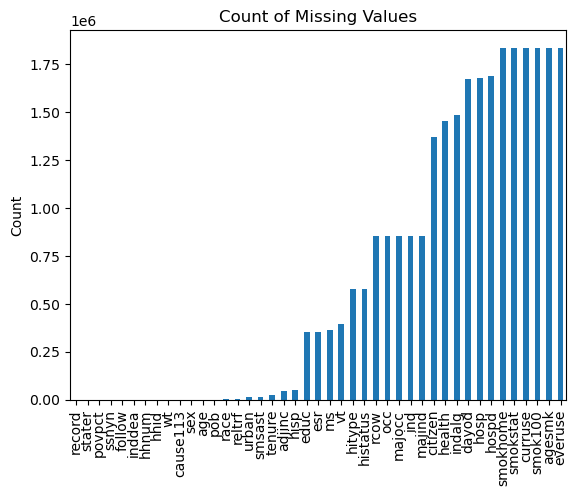

In [5]:
ax = data.isnull().sum().sort_values().plot(kind = 'bar', title='Count of Missing Values')
ax.set_ylabel('Count')
data.loc[:, data.isnull().any()]

Based on above graph, it seems like a lot of attributes have a lot of missing data, therefore we include attributes which have less than 1000000 missing entries for this analysis

In [6]:
data['cause113'].value_counts()

0      1674347
52       18076
55       17954
25       11046
61       10889
        ...   
112          2
39           2
12           1
7            1
1            1
Name: cause113, Length: 106, dtype: int64

In [7]:
# identifying columns with less than 1000000 missing entries: these are the columns that will be retained for further analysis 
df=data[data.columns[data.isnull().sum() < 1000000]]

In [8]:
df.columns

Index(['record', 'age', 'race', 'sex', 'ms', 'hisp', 'adjinc', 'educ', 'pob',
       'wt', 'hhid', 'hhnum', 'reltrf', 'occ', 'majocc', 'ind', 'majind',
       'esr', 'urban', 'smsast', 'inddea', 'cause113', 'follow', 'ssnyn', 'vt',
       'histatus', 'hitype', 'povpct', 'stater', 'rcow', 'tenure'],
      dtype='object')

In [9]:
df.shape

(1835072, 31)

In [10]:
df=df.dropna()
df.shape

(657736, 31)

We drop certain attributes like record id, cause of mortality, death indicator, household no, length of follow-up, which are not relevant for a realistic mortality predictor. Next, we create an input dataframe df_input with relevant attributes that will go as input to the model

In [11]:
df_input=df.drop(['record', 'inddea', 'cause113', 'follow', 'hhid'], axis=1)

In [12]:
#descriptive statistics of the numeric attributes in df_input
df_input.describe()

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhnum,...,urban,smsast,ssnyn,vt,histatus,hitype,povpct,stater,rcow,tenure
count,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,...,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000,657736.000000
mean,38.173501,1.189415,1.467063,2.275366,2.825725,9.318175,9.163382,749.867128,133.830522,3.239205,...,1.283548,2.007790,0.743801,0.146100,0.844342,3.301694,12.746775,53.013230,1.419764,1.325749
std,13.381518,0.598130,0.498914,1.722265,0.523338,3.539717,2.644926,358.514516,72.955694,1.559001,...,0.450721,0.752641,0.436533,0.353206,0.362531,1.565211,6.026787,26.255881,0.697796,0.502202
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,1.000000
25%,28.000000,1.000000,1.000000,1.000000,3.000000,7.000000,8.000000,906.000000,80.000000,2.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,8.000000,31.000000,1.000000,1.000000
50%,37.000000,1.000000,1.000000,1.000000,3.000000,10.000000,8.000000,926.000000,133.000000,3.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,4.000000,13.000000,54.000000,1.000000,1.000000
75%,47.000000,1.000000,2.000000,4.000000,3.000000,12.000000,11.000000,940.000000,176.000000,4.000000,...,2.000000,3.000000,1.000000,0.000000,1.000000,4.000000,18.000000,74.000000,2.000000,2.000000
max,90.000000,5.000000,2.000000,5.000000,3.000000,14.000000,14.000000,960.000000,1522.000000,26.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,5.000000,21.000000,95.000000,5.000000,3.000000


Based on the above summary, it does not appear that there are outliers or anything out of ordinary in the numeric entries in the input dataframe that needs to be addressed before train/testing the data

Define a target mortality variable. Note that this variable is not included in the input dataframe

In [13]:
df['mortality']=1
df.loc[df['cause113']==0,'mortality']=0

### Exploratory Data Analysis

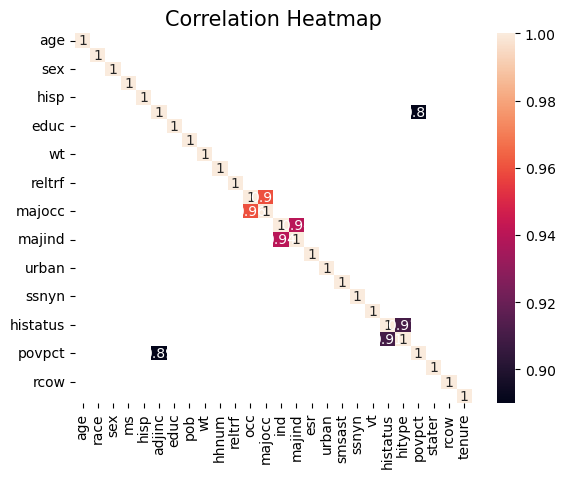

In [14]:
#check correlations between columns, highlight attributes which are highly correlated (absolute correlation>0.85)
cor_matrix = df_input.corr().abs()
cor_matrix = np.around(cor_matrix,2)
sns.heatmap(cor_matrix[cor_matrix>0.85], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

In [15]:
#find columns that are strongly correlated either positively or negatively with an absolute value of correlation > 0.85
cor_matrix = df_input.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
high_corr_col = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] 
print('Highly Correlated Columns:' , high_corr_col)

Highly Correlated Columns: ['majocc', 'majind', 'hitype', 'povpct']


Drop the variables majind, hitype and povpct as they have a highly correlated counterpart in other attributes

In [16]:
df_input.drop(['majind', 'hitype', 'povpct'], axis=1, inplace=True)
df_input.shape

(657736, 23)

In [17]:
df['mortality'].value_counts(normalize=True)

0    0.957036
1    0.042964
Name: mortality, dtype: float64

<Axes: ylabel='mortality'>

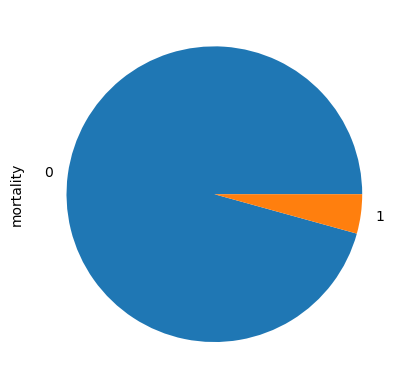

In [18]:
df['mortality'].value_counts(normalize=True).plot(kind='pie')

This data has class imbalance with the 'mortality' class only being about 4.3%. 

[Text(0.5, 1.0, 'Age distribution by mortality')]

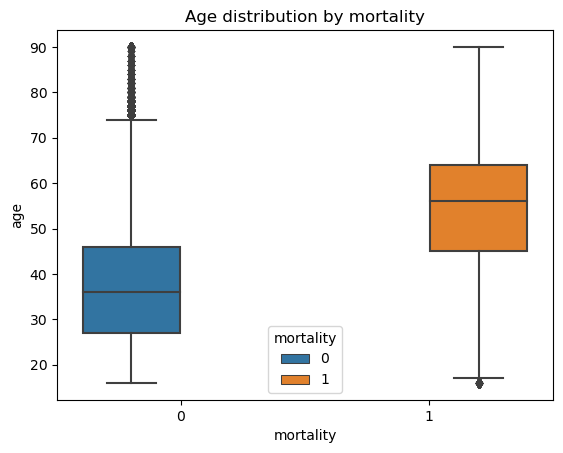

In [19]:
#Effect of age on mortality
fig = sns.boxplot(df, x='mortality', y='age', hue='mortality')
fig.set(title='Age distribution by mortality')

[Text(0.5, 1.0, 'Education level vs mortality')]

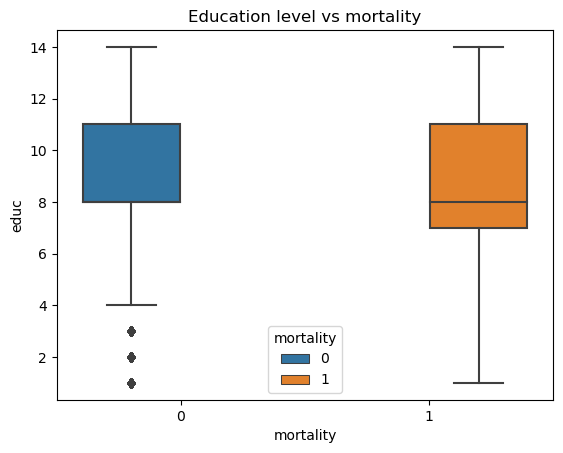

In [20]:
#Education by mortality

fig = sns.boxplot(df, x='mortality', y='educ', hue='mortality')
fig.set(title='Education level vs mortality')


[Text(0.5, 1.0, 'Number of Household Members vs mortality')]

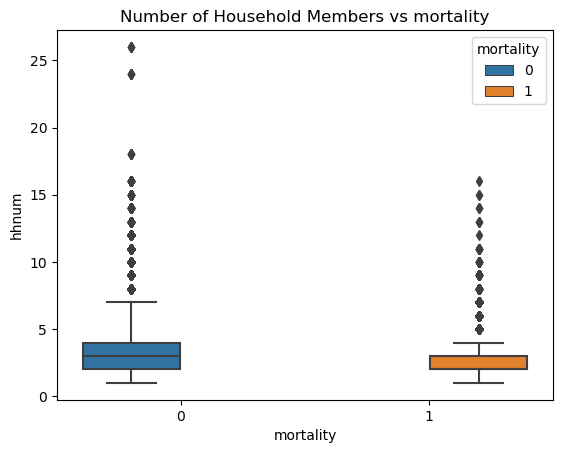

In [21]:
#number of household members vs mortality

fig = sns.boxplot(df, x='mortality', y='hhnum', hue='mortality')
fig.set(title='Number of Household Members vs mortality')

[Text(0.5, 1.0, 'Income vs mortality')]

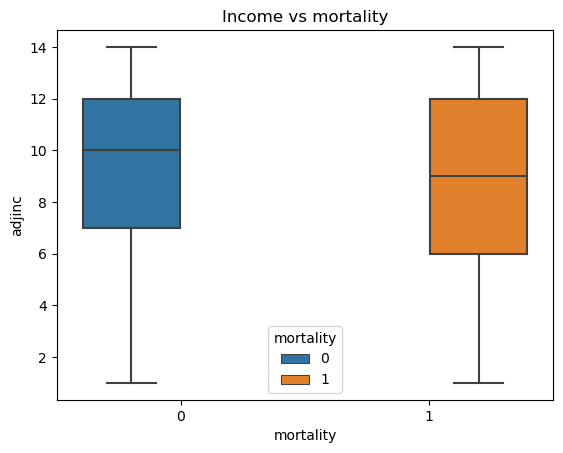

In [22]:
#income vs mortality

fig = sns.boxplot(df, x='mortality', y='adjinc', hue='mortality')
fig.set(title='Income vs mortality')

It was clear that the mortality group had a higher median age, lower education level , lower median income and a lower median number of household members (hhnum) compared to the alive (mortality=0) group. Let's continue to explore more data with some other features as below.

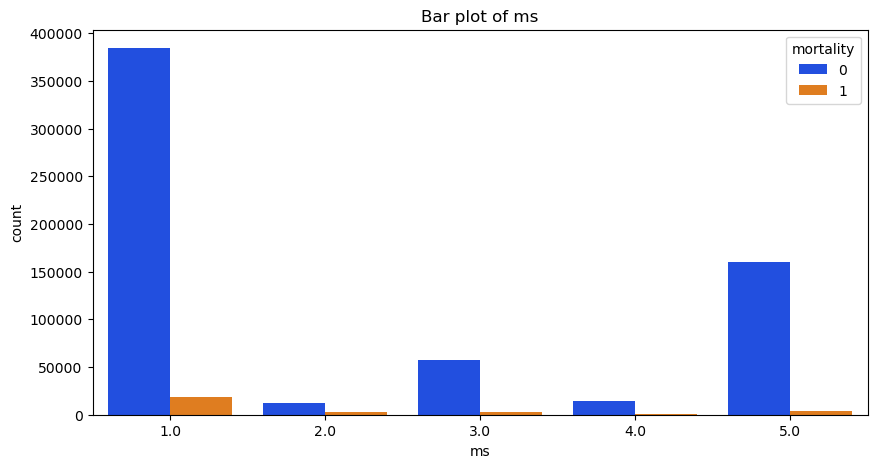

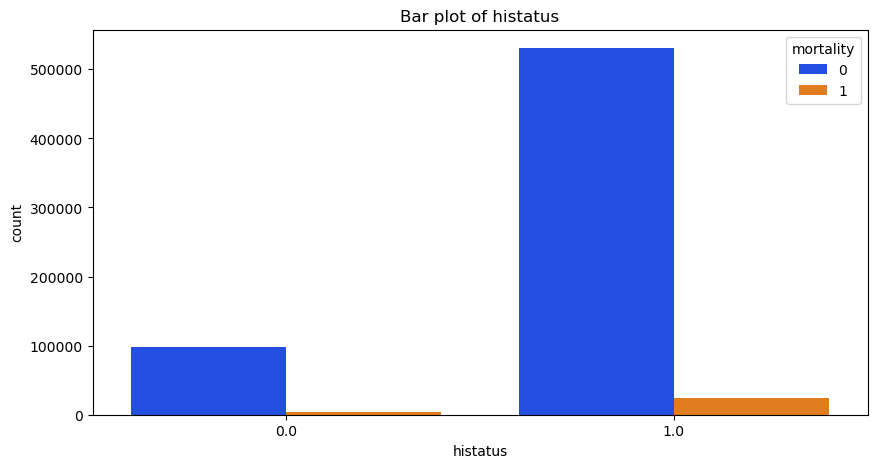

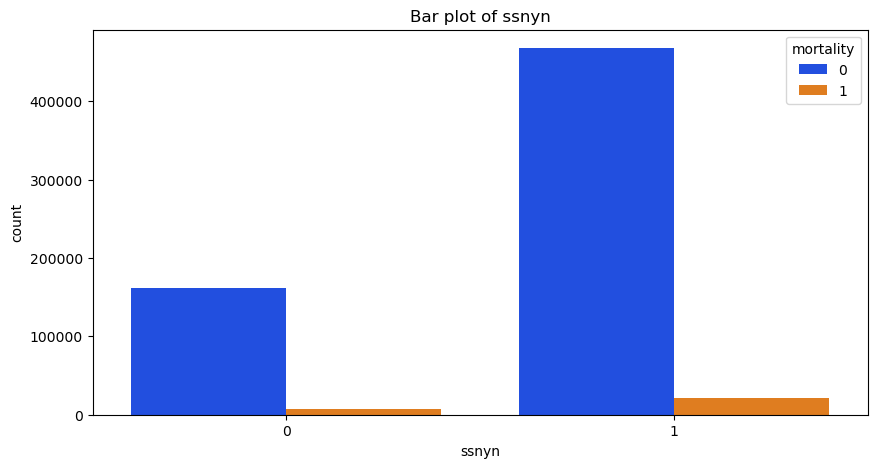

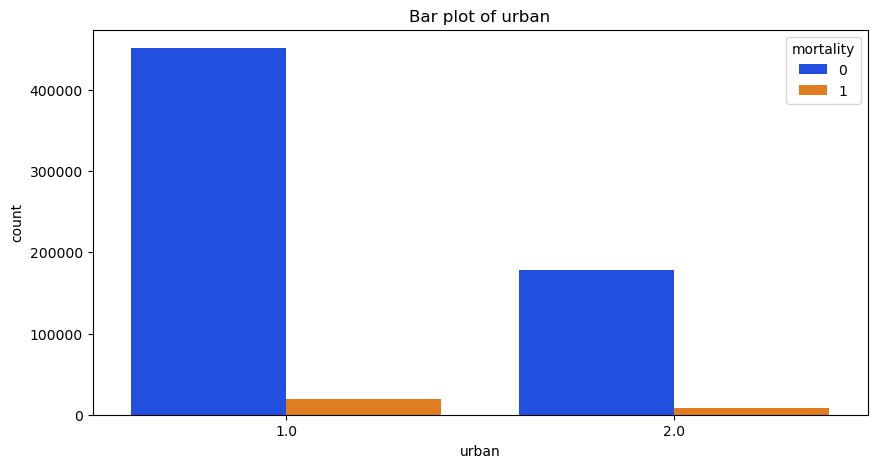

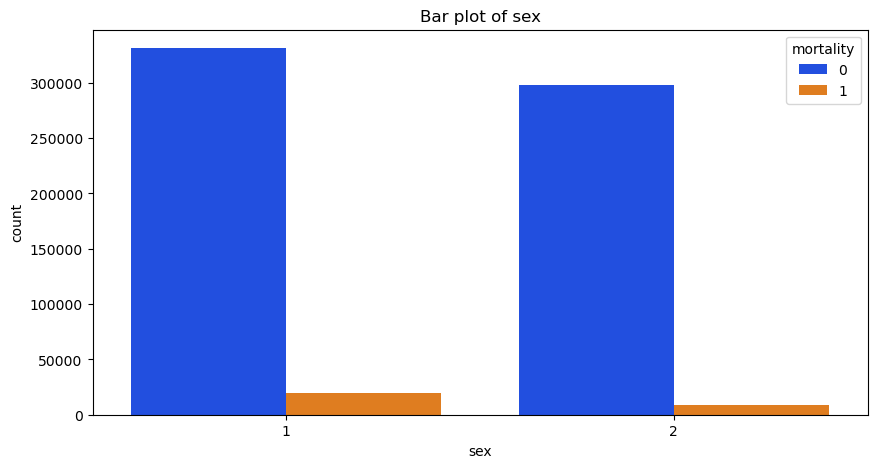

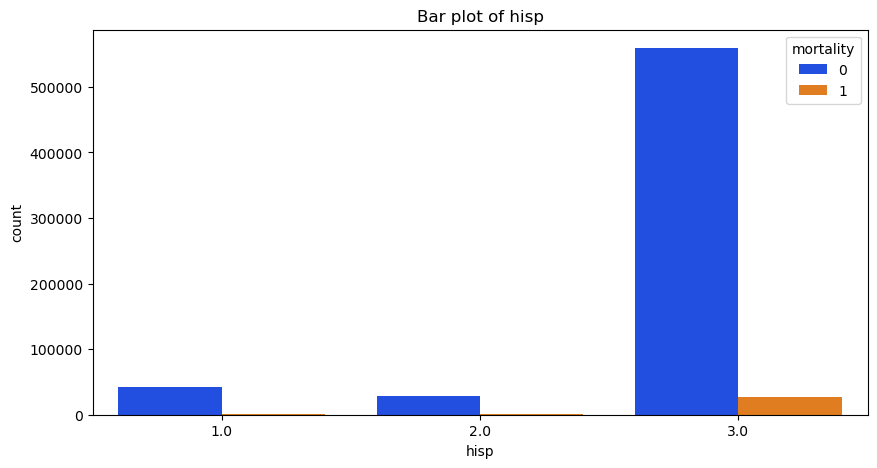

In [23]:
feat_list = ['ms','histatus','ssnyn','urban','sex', 'hisp']
for feature in feat_list:
    plt.figure(figsize=(10,5))
    sns.countplot(x = feature, data = df, hue = 'mortality', palette = 'bright')
    plt.title('Bar plot of '+feature)
    plt.show()



The effect on mortality of these features were a little less clear but it seems like all of these features may have some impact on mortality and seemingly they are all good to consider for mortality prediction

### Unsupervised Machine Learning

[0.12558408 0.23385707 0.31547754 0.3818199  0.4454978  0.49948658
 0.5504521  0.59685125 0.64014917 0.68109016 0.71997932 0.75750248
 0.7913897  0.82346685 0.85347505 0.87999471 0.90433753 0.92534757
 0.9457503  0.96505989 0.98273223 0.9986531  1.        ]


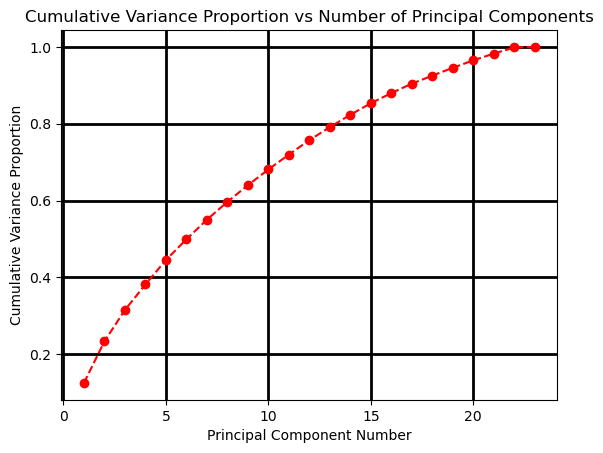

In [25]:
#use standard scaler for scaling input dataframe
scaler = StandardScaler()
scaler.fit(df_input)
df_scaled = scaler.fit_transform(df_input)

#principal component analysis using PCA
pca=PCA()
df_pca = pca.fit_transform(df_scaled)
plt.plot(np.arange(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'ro--')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Variance Proportion')
plt.title('Cumulative Variance Proportion vs Number of Principal Components')
print(np.cumsum(pca.explained_variance_ratio_))

From the above principal component analysis it seems like 18 components are needed for retaining 90% of the variance in the data.

In [26]:
# PCA using n_components=18
pca18=PCA(n_components=18)
df_pca18 = pca18.fit_transform(df_scaled)

#create a dataframe of the principal component values
df18 = pd.DataFrame(df_pca18, columns = [f'pca_{i}' for i in range(1, 19)])
df18.head()


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18
0,0.193708,-3.049816,0.512215,-2.757017,0.588751,0.400468,-0.643341,-0.580479,0.789693,0.233176,0.887556,-0.110753,-1.048478,-0.401796,0.584984,-0.077198,0.454600,-0.233849
1,-0.776753,0.121496,-0.223034,-1.109157,1.027914,1.063487,-1.975887,-0.408298,0.313621,0.652752,0.841317,0.422247,-0.397030,-0.655957,0.422280,0.074459,0.397491,0.001891
2,0.665366,-3.328490,0.430112,-2.241382,1.591481,0.044404,-0.510706,-0.171049,0.999535,0.011244,1.511442,0.078827,-1.350414,0.266238,0.230929,-0.448541,0.335961,-0.450974
3,-0.495617,-0.027308,-0.261395,-0.428642,1.907935,0.613581,-1.689686,-0.051053,0.629672,0.311233,1.342220,0.958752,-0.616066,-0.236188,0.578468,-0.496163,0.093506,-0.171623
4,0.510623,2.187058,-1.259166,-0.397122,2.157979,0.456420,-0.225875,-0.551305,0.776452,0.180693,1.187626,0.604432,-1.074618,0.413883,1.639155,0.142388,-0.760918,0.203760


In [28]:
#including the target variable mortality in the above dataframe for later plotting.
df18['mortality'] =df['mortality']

In [30]:
#Prep data for K Means Clustering by dropping the target variable column and assigning to a new data frame X
X=df18
# dropping the target variable mortality as we are doing unsupervised machine learning
X=X.drop(['mortality'], axis=1)
# Choose number of clusters =3, init = default (Kmeans ++)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# add a column to X with labels from kmeans algorithm
X['labels'] = kmeans.labels_
X.head(5)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,labels
0,0.193708,-3.049816,0.512215,-2.757017,0.588751,0.400468,-0.643341,-0.580479,0.789693,0.233176,0.887556,-0.110753,-1.048478,-0.401796,0.584984,-0.077198,0.454600,-0.233849,0
1,-0.776753,0.121496,-0.223034,-1.109157,1.027914,1.063487,-1.975887,-0.408298,0.313621,0.652752,0.841317,0.422247,-0.397030,-0.655957,0.422280,0.074459,0.397491,0.001891,1
2,0.665366,-3.328490,0.430112,-2.241382,1.591481,0.044404,-0.510706,-0.171049,0.999535,0.011244,1.511442,0.078827,-1.350414,0.266238,0.230929,-0.448541,0.335961,-0.450974,0
3,-0.495617,-0.027308,-0.261395,-0.428642,1.907935,0.613581,-1.689686,-0.051053,0.629672,0.311233,1.342220,0.958752,-0.616066,-0.236188,0.578468,-0.496163,0.093506,-0.171623,1
4,0.510623,2.187058,-1.259166,-0.397122,2.157979,0.456420,-0.225875,-0.551305,0.776452,0.180693,1.187626,0.604432,-1.074618,0.413883,1.639155,0.142388,-0.760918,0.203760,2


In [32]:
# Kmeans algorithms show clusters but not clear how the clusters may relate to outcome
# Let's add to the plot the points corresponding to mortality = 1. 

X_mortality=df18.loc[df18['mortality']==1]

X_mortality.head(4)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,mortality
577805,1.214111,-2.125719,0.053013,-1.092218,1.233554,-0.896733,-1.191637,-0.296351,-0.020497,-0.365462,0.866063,-0.007213,0.600823,-0.589791,0.017638,-0.249542,-1.014098,-0.760738,1.0
577913,-2.185191,-3.297742,2.276066,1.995534,-2.616856,1.581405,1.679012,-0.783494,0.135099,-0.165699,-0.285762,-0.240793,0.364942,-0.472739,1.864725,-1.072025,0.153619,-0.213690,1.0
577939,-1.972416,-0.003467,-1.762317,1.617332,0.108199,0.151651,-0.781114,-0.364944,-0.481912,-0.491831,-0.504351,-0.162958,-0.796943,-0.329742,-0.499271,0.196579,0.630614,0.115282,1.0
577958,-1.869091,0.215883,-0.958538,2.663768,1.529375,-1.509206,0.059419,0.959000,-0.074342,-0.006862,0.279361,-0.117625,-0.262815,0.634366,-0.434085,-1.095128,0.012950,-0.699651,1.0


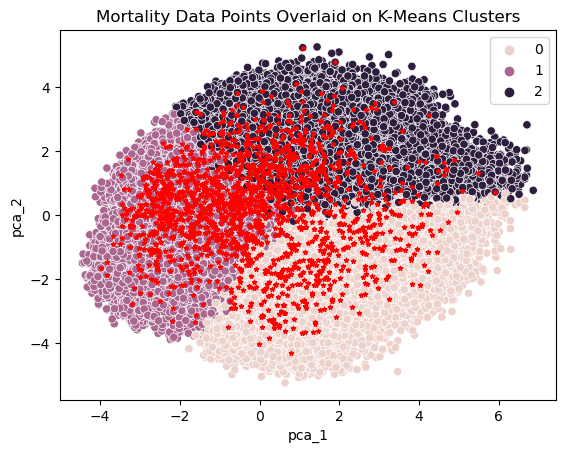

In [33]:
# Label in the scatter plot the data points corresponding to mortality = 1 with a *
sns.scatterplot(data = X, x= 'pca_1', y= 'pca_2', hue=kmeans.labels_). set(title='Mortality Data Points Overlaid on K-Means Clusters')
plt.scatter(X_mortality['pca_1'], X_mortality['pca_2'], marker='*', color='red',s=10)

In [34]:
#Lets add labels to the original dataframe and see how mortality compares between the three clusters
df['cluster_labels']=kmeans.labels_
df.head()

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,ssnyn,vt,histatus,hitype,povpct,stater,rcow,tenure,mortality,cluster_labels
577768,685327,55,1.0,1,1.0,3.0,12.0,7.0,909,160,...,1,1.0,1.0,4.0,20,16,1.0,1.0,0,0
577769,685328,52,1.0,2,1.0,3.0,12.0,8.0,909,165,...,1,0.0,1.0,4.0,20,16,1.0,1.0,0,1
577770,685329,57,1.0,1,1.0,3.0,12.0,7.0,909,160,...,1,1.0,1.0,4.0,13,16,1.0,1.0,0,0
577771,685330,53,1.0,2,1.0,3.0,12.0,7.0,909,165,...,1,0.0,1.0,4.0,13,16,1.0,1.0,0,1
577772,685331,19,1.0,2,5.0,3.0,12.0,4.0,909,180,...,1,0.0,1.0,4.0,13,16,1.0,1.0,0,2


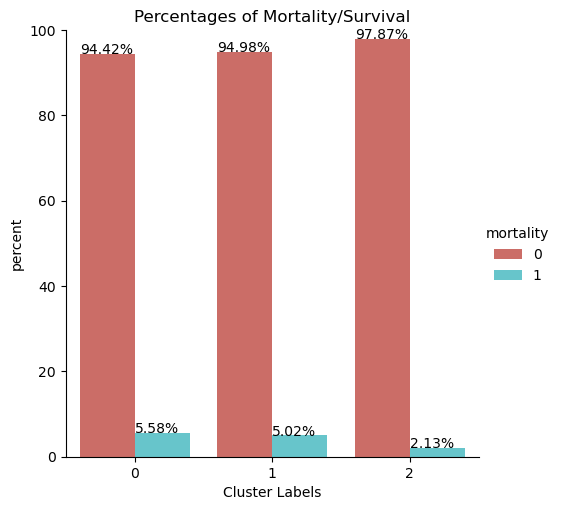

In [35]:
x,y = 'cluster_labels', 'mortality'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Mortality/Survival')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Percentages of mortality in clusters with labels 0 and 1 are more than twice the mortality in cluster label 2, indicating that clusters with label 0 and 1 are the higher risk groups for mortality

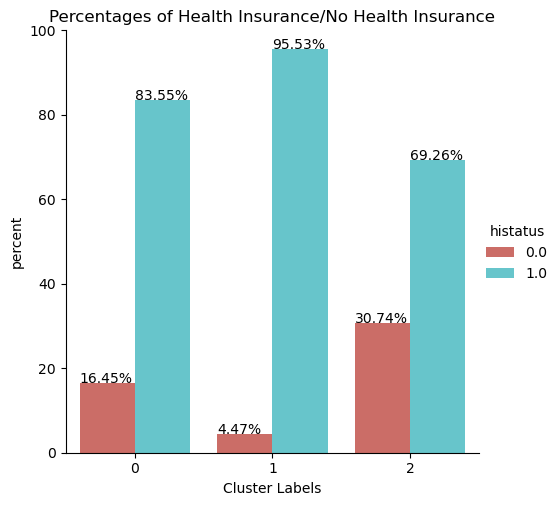

In [36]:
#comparing health insurance status for the clusters
x,y = 'cluster_labels', 'histatus'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Health Insurance/No Health Insurance')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Cluster with labels 0 and 2 have higher percentages of subjects with no health insurance compared to cluster with label 2

[Text(0.5, 1.0, 'Differences in Age across the Three Clusters')]

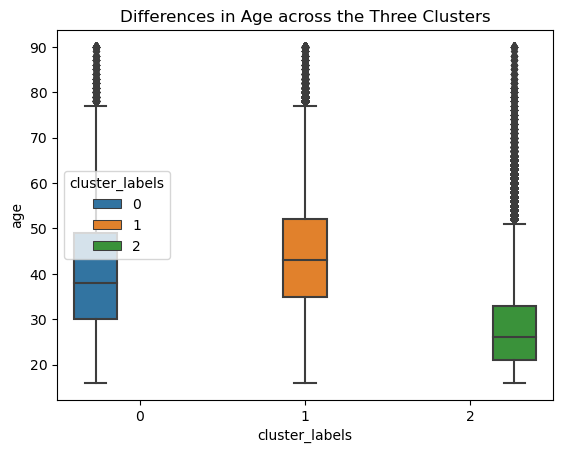

In [37]:
#comparing ages across the different clusters

fig=sns.boxplot(df, x = 'cluster_labels', y='age', hue='cluster_labels')
fig.set(title='Differences in Age across the Three Clusters')


Cluster 2 seems to be group with the lowest median age (<30 years). Cluster 0 had a higher median age (slightly under 40 years) while Cluster 1 was the oldest group with the highest median age (~ 45 years)

In [38]:
#exploring the percentages of different types of mortality in the groups

# mortality due to cardiopulmonary diseases
df['mortality_cardiopulmonary']=0
df.loc[(df['cause113']>=50)&(df['cause113']<=76), 'mortality_cardiopulmonary']=1

#mortality due to infections
df['mortality_infections'] = 0
df.loc[(df['cause113']>=1)&(df['cause113']<=17), 'mortality_infections']=1

#mortality due to cancer
df['mortality_cancer'] = 0
df.loc[(df['cause113']>=18)&(df['cause113']<=41), 'mortality_cancer']=1

#mortality due to accidents
df['mortality_accident'] = 0
df.loc[(df['cause113']>=96)&(df['cause113']<=104), 'mortality_accident']=1


In [39]:
df18['mortality_cardiopulmonary'] =df['mortality_cardiopulmonary']
df18['mortality_infections'] =df['mortality_infections']
df18['mortality_cancer'] = df['mortality_cancer']
df18['mortality_accident'] = df['mortality_accident']

In [40]:
X_mortality_cardiopulmonary=df18.loc[df18['mortality_cardiopulmonary']==1]
X_mortality_infections=df18.loc[df18['mortality_infections']==1]
X_mortality_cancer=df18.loc[df18['mortality_cancer']==1]
X_mortality_accident=df18.loc[df18['mortality_accident']==1]

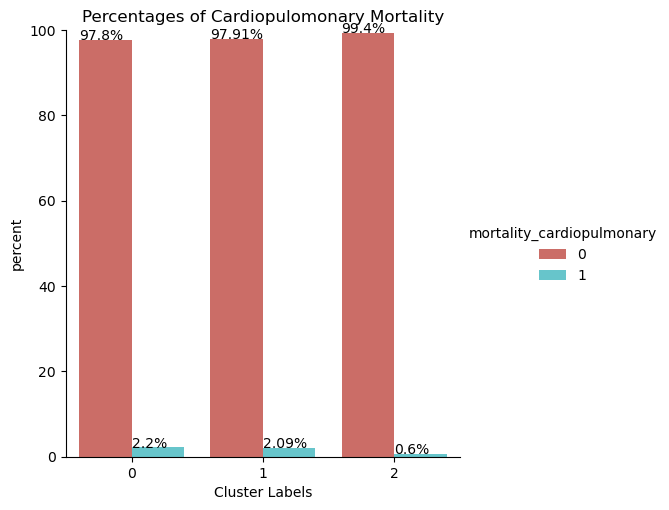

In [41]:
x,y = 'cluster_labels', 'mortality_cardiopulmonary'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Cardiopulomonary Mortality')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

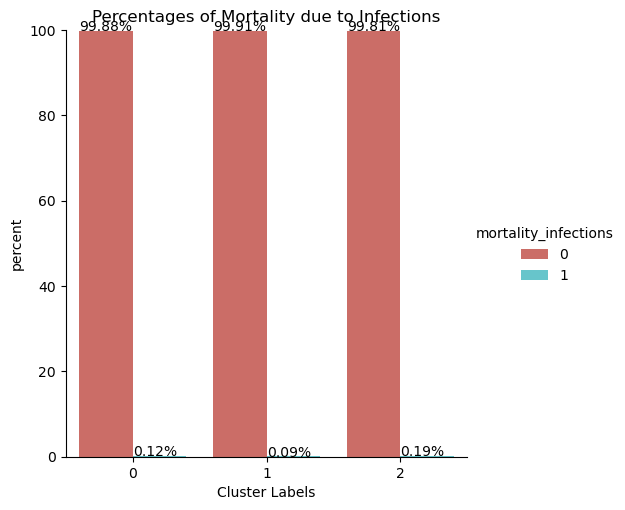

In [42]:
x,y = 'cluster_labels', 'mortality_infections'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Mortality due to Infections')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

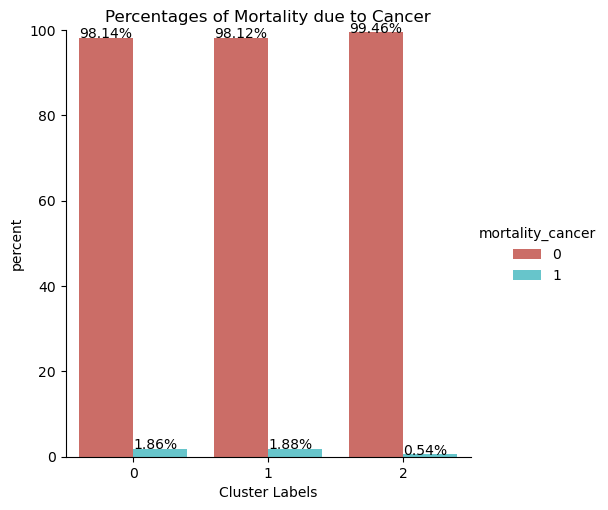

In [43]:
x,y = 'cluster_labels', 'mortality_cancer'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Mortality due to Cancer')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

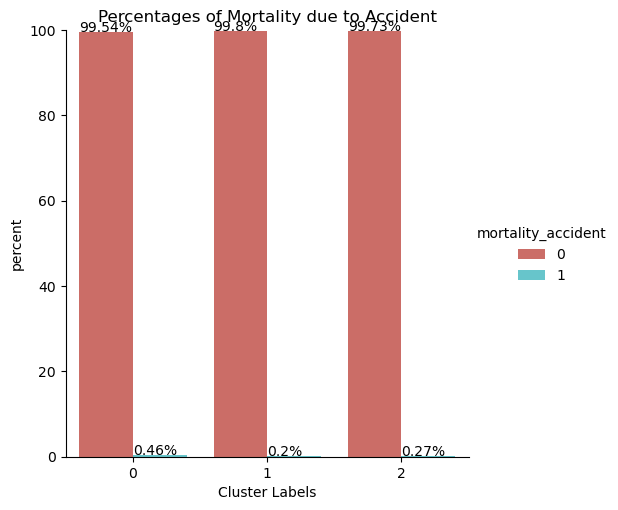

In [44]:
x,y = 'cluster_labels', 'mortality_accident'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette ='hls')
g.ax.set_ylim(0,100)
plt.title('Percentages of Mortality due to Accident')
plt.xlabel('Cluster Labels')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

The unsupervised learning using PCA and KMeans Clustering with number of clusters =3 seem to have meaningfully divided the population into three clusters: cluster 2 with median age under 30 years and clusters 0 and 1 with median ages of under 40 and 45 years respectively. The two younger age groups, clusters 2 and 0, have higher percentages of people without health insurance compared to cluster 1. Interestingly, percentage of overall mortality is highest in cluster 0 even though it had the intermediate median age, closely followed by cluster 1 (which had the highest median age). Cluster 2 which is the youngest cluster, has the lowest mortality percentage as expected, though certain types of mortality like death due to infections had the highest incidence by percentage in cluster 2. Cluster 0 and cluster 1 have very similar (and higher, compared to cluster 2) percentages of mortality due to cardiopulmonary causes and cancer but incidence (%) of mortality  due to accident in cluster 0 was close to two times that in  cluster 1 and cluster 2. While the clusters were interesting by some of their characteristics, the overall mortality percentages in any one cluster were not high enough for any group to be considered highly sensitive and specific to overall mortality or mortality due to a specific cause.

### Supervised Machine Learning
The goal here is to build models of different classifiers with the objective of predicting mortality based on the input attributes. It is a binary classification task and different classifiers including Logistic Regression, Random Forest, Gradient Boosting Classifier, Naive Bayes and Mult-Layer Percepton Classifier (from scikit neural networks) are compared in terms of their ROC areas for sensitivity/specificity to mortality.

In [45]:
# defining input and target variables for supervised machine learning
X=df_scaled
y= df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Synthetic Minority Oversampling for addressing class imbalance
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [46]:
#logistic Regression Model

logreg = LogisticRegression().fit(X_train_res, y_train_res)

preds = logreg.predict(X_test)

accuracy = accuracy_score(y_test, preds)

fscore = f1_score(y_test, preds)

recall = recall_score(y_test, preds)

print('Accuracy:', np.around(accuracy,2))
print('F1 score:', np.around(fscore,2))
print('Recall:', np.around(recall,2))
print(classification_report(y_test, preds))

Accuracy: 0.77
F1 score: 0.21
Recall: 0.73
              precision    recall  f1-score   support

           0       0.98      0.77      0.86    157392
           1       0.12      0.73      0.21      7042

    accuracy                           0.77    164434
   macro avg       0.55      0.75      0.54    164434
weighted avg       0.95      0.77      0.84    164434



In [50]:
#Random Forest Classifier

rf_clf= RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train_res, y_train_res)


preds_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, preds_rf)

fscore_rf = f1_score(y_test, preds_rf)

recall_rf= recall_score(y_test, preds_rf)

print('Accuracy for Random Forest classifier:', np.around(accuracy_rf,2))
print('F1 score for Random Forest classifier:', np.around(fscore_rf,2))
print('Recall for Random Forest classifer:', np.around(recall_rf,2))
print(classification_report(y_test, preds_rf))



Accuracy for Random Forest classifier: 0.95
F1 score for Random Forest classifier: 0.24
Recall for Random Forest classifer: 0.17
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    157392
           1       0.43      0.17      0.24      7042

    accuracy                           0.95    164434
   macro avg       0.70      0.58      0.61    164434
weighted avg       0.94      0.95      0.95    164434



In [51]:
# Naive Bayes classifier

gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82    157392
           1       0.10      0.70      0.17      7042

    accuracy                           0.70    164434
   macro avg       0.54      0.70      0.49    164434
weighted avg       0.94      0.70      0.79    164434



In [86]:
# Gradient Boosting Classifier

gbt_clf = GradientBoostingClassifier(loss='log_loss', #deviance or explonential
                               criterion='squared_error', # {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=500 # how many trees to build
                              )

gbt_clf.fit(X_train_res, y_train_res)
print(classification_report(y_test, gbt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    157392
           1       0.33      0.27      0.30      7042

    accuracy                           0.94    164434
   macro avg       0.65      0.62      0.63    164434
weighted avg       0.94      0.94      0.94    164434



In [53]:
# MLP Classifier

from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000,activation = 'relu',solver='adam',random_state=0)
mlp_classifier.fit(X_train_res, y_train_res)
print(classification_report(y_test, mlp_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93    157392
           1       0.16      0.44      0.23      7042

    accuracy                           0.87    164434
   macro avg       0.56      0.67      0.58    164434
weighted avg       0.94      0.87      0.90    164434



Text(0.5, 1.0, 'Comparing ROC curves for different classifiers')

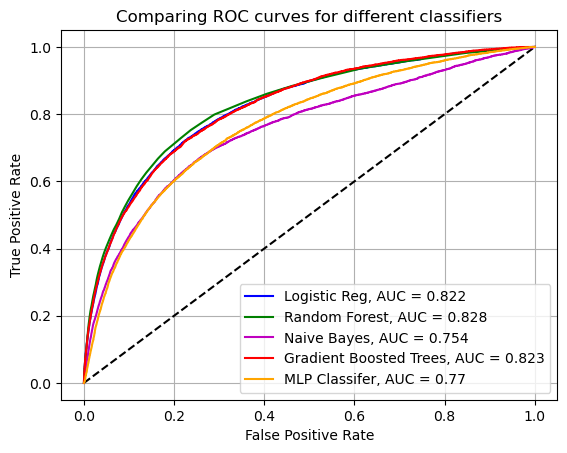

In [54]:
#compare ROC curves for different models

plt.plot([0, 1], [0, 1],'k--')


fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
fpr_gbt, tpr_gbt, thresh_gbt = roc_curve(y_test, gbt_clf.predict_proba(X_test)[:,1])
fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(y_test, mlp_classifier.predict_proba(X_test)[:,1])



auc_logreg = roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] )
auc_rf = roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1] )
auc_gnb = roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1] )
auc_gbt = roc_auc_score(y_test,gbt_clf.predict_proba(X_test)[:,1] )
auc_mlp = roc_auc_score(y_test,mlp_classifier.predict_proba(X_test)[:,1] )



plt.plot(fpr_logreg, tpr_logreg,'b', label=f'Logistic Reg, AUC = {str(round(auc_logreg,3))}')
plt.plot(fpr_rf, tpr_rf,'g', label=f'Random Forest, AUC = {str(round(auc_rf,3))}')
plt.plot(fpr_gnb, tpr_gnb,'m', label=f'Naive Bayes, AUC = {str(round(auc_gnb,3))}')
plt.plot(fpr_gbt, tpr_gbt, 'r', label=f'Gradient Boosted Trees, AUC = {str(round(auc_gbt,3))}')
plt.plot(fpr_mlp, tpr_mlp,'orange', label=f'MLP Classifer, AUC = {str(round(auc_mlp,3))}')







plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Comparing ROC curves for different classifiers')

### Based on ROC AUC, the best classifier is the Random Forest model with an AUC of 0.83.

Text(0, 0.5, 'True/False Positive Rates')

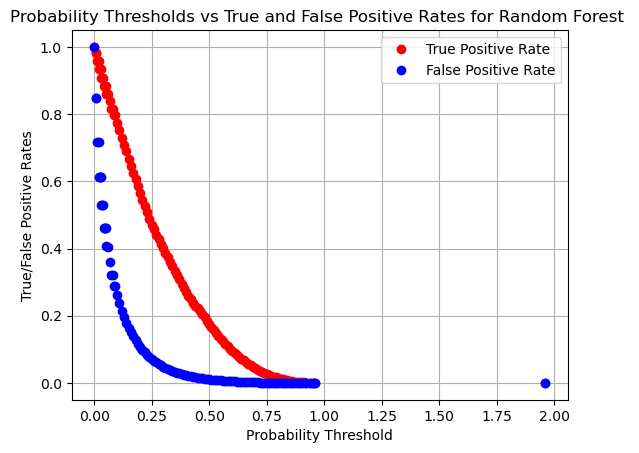

In [84]:
plt.plot(thresh_rf, tpr_rf, 'ro', label='True Positive Rate')
plt.plot(thresh_rf, fpr_rf, 'bo', label='False Positive Rate')
plt.legend()
plt.grid()
plt.title('Probability Thresholds vs True and False Positive Rates for Random Forest ')
plt.xlabel('Probability Threshold')
plt.ylabel('True/False Positive Rates')

We take our best model, the Random Forest classifier, and tune the hyperparameters using RandomizedSearchCV. RandomizedSearchCV was chosen instead of the regular GridSearchCV as the latter was not efficient from the 'run-time' perspective on this fairly large dataset.

In [63]:
# Number of trees in random forest
n_estimators = [50, 75, 100]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_search_cv_rfclf = RandomizedSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), random_grid, verbose=1, cv=3, scoring='roc_auc')
random_search_cv_rfclf.fit(X_train, y_train)

random_search_cv_rfclf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_jobs=-1,
                       random_state=0)

Text(0.5, 1.0, 'Comparing ROC curves for Default Random Forest  and\n Hyperparameter-Optimized Random Forest ')

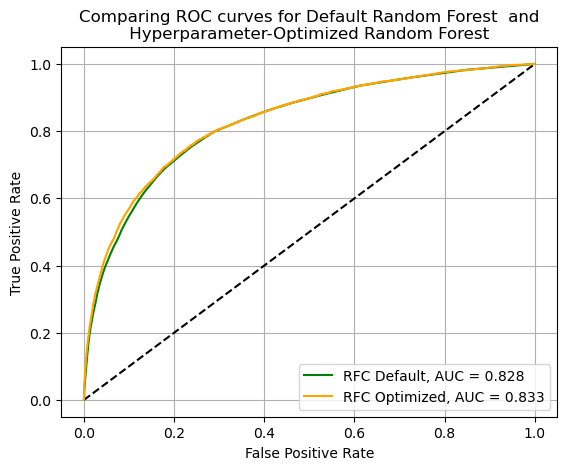

In [64]:
plt.plot([0, 1], [0, 1],'k--')



fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
fpr_random_search_cv_rfclf, tpr_random_search_cv_rfclf, thresh_random_search_cv_rfclf = roc_curve(y_test, random_search_cv_rfclf.predict_proba(X_test)[:,1])


auc_rf = roc_auc_score(y_test,rf_clf.predict_proba(X_test)[:,1] )
auc_random_search_cv_rfclf = roc_auc_score(y_test,random_search_cv_rfclf.predict_proba(X_test)[:,1] )



plt.plot(fpr_rf, tpr_rf,'g', label=f'RFC Default, AUC = {str(round(auc_rf,3))}')
plt.plot(fpr_random_search_cv_rfclf, tpr_random_search_cv_rfclf,'orange', label=f'RFC Optimized, AUC = {str(round(auc_random_search_cv_rfclf,3))}')



plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Comparing ROC curves for Default Random Forest  and\n Hyperparameter-Optimized Random Forest ')

**There was not much difference in performances of the default random forest and hyper-parameter optimized random forest with both having an AUC of ~ 0.83**

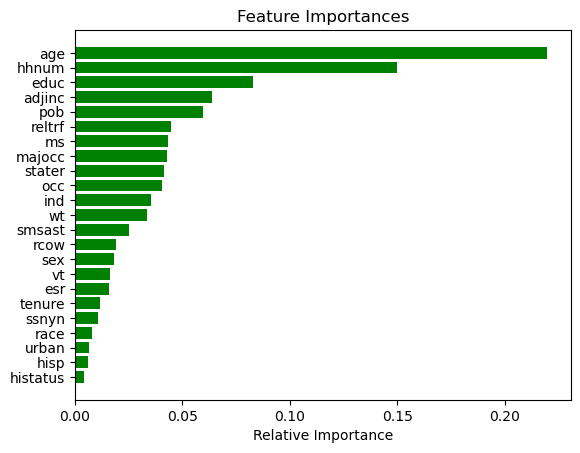

In [68]:
#random forest model intepretation

importances = rf_clf.feature_importances_
indices = np.argsort(importances)
features = df_input.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above analysis, the top five factors with the most impact (in order of impact with the highest listed first) on the model predictions o are the following
1) age
2) hhnum : number of people in household
3) educ: education as measured by the level of highest grade completed
4) adjinc: inflation adjusted income
5) pob: region of birth

It is no surprise that age is the top factor for mortality prediction. However there are a number of socioeconomic factors like number of people living in household, level of education and income which were also quite impactful for the model prediction. Interestingly attributes like presence of social security (ssnyn), race, status of health insurance (histatus) had the least impact on model predictions.

### Counterfactual Explanations for the Random Forest Model

We start by inverse transforming the Standard Scaler, mainly for ease of interpretation of the counterfactual explanations, and putting the train and test datasets into a pandas dataframe so that it becomes compatible with the dice_ml package for generating counterfactuals

In [69]:
df_inv_transform = scaler.inverse_transform(df_scaled)
X1=df_inv_transform
y1= df['mortality']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

sm = SMOTE(random_state = 2)
X1_train_res, y1_train_res = sm.fit_resample(X1_train, y1_train.ravel())
train_dataset_df = pd.DataFrame(X1_train_res, columns = df_input.columns[0:23])
y_train_res_df = pd.DataFrame(y1_train_res.ravel(), columns=['mortality'])
rf_clf_pd = RandomForestClassifier(random_state=0, n_jobs=-1).fit(train_dataset_df, y_train_res_df)


C:\Users\subha\AppData\Local\Temp\ipykernel_10088\2659427293.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_pd = RandomForestClassifier(random_state=0, n_jobs=-1).fit(train_dataset_df, y_train_res_df)


In [128]:
pip install dice-ml


Note: you may need to restart the kernel to use updated packages.


In [70]:
import dice_ml

In [71]:
train_dataset = train_dataset_df
train_dataset['mortality'] = y1_train_res


In [72]:
d = dice_ml.Data(dataframe=train_dataset,continuous_features=['educ','adjinc'], outcome_name='mortality')


In [73]:
m = dice_ml.Model(model=rf_clf_pd, backend='sklearn')

In [74]:
exp = dice_ml.Dice(d,m)

In [75]:
test_dataset_df = pd.DataFrame(X1_test, columns = df_input.columns[0:23])
model_predict_test = rf_clf_pd.predict(test_dataset_df)

In [76]:
model_predict_test_df = pd.DataFrame(model_predict_test, columns = ['Mortality Predictions'])

C:\Users\subha\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'ROC curve for RFC (w/o StandardScaler)')

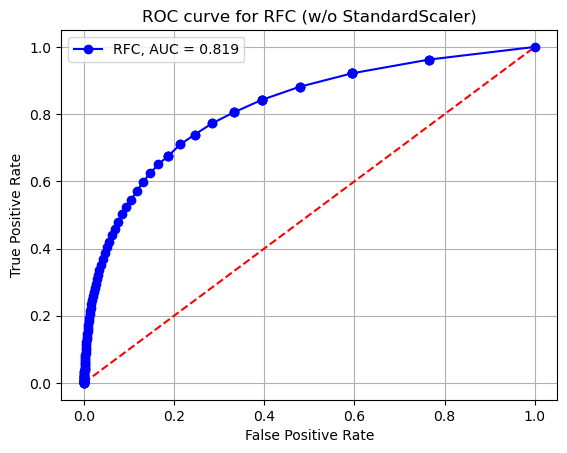

In [77]:
plt.plot([0, 1], [0, 1],'r--')
preds_proba_rf_clf_pd = rf_clf_pd.predict_proba(X1_test)
probs_rf_clf_pd = preds_proba_rf_clf_pd[:, 1]
fpr_rf_clf_pd, tpr_rf_clf_pd, thresh_rf_clf_pd = roc_curve(y1_test, probs_rf_clf_pd)
auc_rf_clf_pd = roc_auc_score(y1_test, probs_rf_clf_pd)
plt.plot(fpr_rf_clf_pd, tpr_rf_clf_pd,'bo-', label=f'RFC, AUC = {str(round(auc_rf_clf_pd,3))}')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('ROC curve for RFC (w/o StandardScaler)')

This is just confirmation that Random Forest works almost similarly well without the Standard Scaler, so that we are not majorly impacting the performance of the model by inverse transforming

In [79]:
mortality_indices = model_predict_test_df.loc[(model_predict_test_df['Mortality Predictions']==1) & (test_dataset_df['educ']< 4.0) & (test_dataset_df['adjinc']< 4.0) ].index
mortality_indices

Int64Index([ 40846,  45034,  50816,  60392,  61495,  66153,  66385,  74360,
             75909,  76131,  83403,  95172, 105106, 106007, 133824, 138302,
            146461, 152680, 154261, 157976],
           dtype='int64')

In [80]:
test_dataset_df.iloc[mortality_indices[0:2]]

,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhnum,...,ind,esr,urban,smsast,ssnyn,vt,histatus,stater,rcow,tenure
40846,75.0,2.0,2.0,2.0,3.0,3.0,3.0,917.0,155.0,1.0,...,9290.0,1.0,1.0,3.0,1.0,0.0,1.0,33.0,1.0,1.0
45034,80.0,2.0,1.0,2.0,3.0,2.0,3.0,927.0,103.0,1.0,...,8770.0,4.0,1.0,1.0,1.0,0.0,1.0,42.0,1.0,1.0


In [82]:
e1=exp.generate_counterfactuals(test_dataset_df.iloc[mortality_indices[0:1]], total_CFs=2, desired_class='opposite', features_to_vary=['adjinc', 'educ'])
e1.visualize_as_dataframe(show_only_changes=True)


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:24<00:00, 24.54s/it]

Query instance (original outcome : 1)


,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhnum,...,esr,urban,smsast,ssnyn,vt,histatus,stater,rcow,tenure,mortality
0,75.0,2.0,2.0,2.0,3.0,3.0,3.0,917.0,155.0,1.0,...,1.0,1.0,3.0,1.0,0.0,1.0,33.0,1.0,1.0,1



Diverse Counterfactual set (new outcome: 0.0)


,age,race,sex,ms,hisp,adjinc,educ,pob,wt,hhnum,...,esr,urban,smsast,ssnyn,vt,histatus,stater,rcow,tenure,mortality
0,75.0,2.0,2.0,2.0,3.0,11.2,12.0,917.0,155.0,1.0,...,1.0,1.0,3.0,1.0,0.0,1.0,33.0,1.0,1.0,0.0
1,75.0,2.0,2.0,2.0,3.0,6.7,-,917.0,155.0,1.0,...,1.0,1.0,3.0,1.0,0.0,1.0,33.0,1.0,1.0,0.0


The counterfactuals showed that by increasing the level of education and/or level of income, the model prediction altered from mortality to 'no mortality', indicating that higher education and income are important factors to consider for preventing mortality and extending life span.